In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from pylab import rcParams

In [2]:
#Functionality / alerts code
location = input("Enter your location:")
print(location)

temperature = 0
#print(temperature)
water_temps = []
#print(water_temps)

#Generates an example dataset
for i in range(0, 24):
    temperature = int(input("Temperature(℃)"))
    print(temperature,"℃")
    water_temps.append(temperature)

Enter your location:Gulf Harbour
Gulf Harbour
Temperature(℃)23
23 ℃
Temperature(℃)20
20 ℃
Temperature(℃)32
32 ℃
Temperature(℃)18
18 ℃
Temperature(℃)31
31 ℃
Temperature(℃)10
10 ℃
Temperature(℃)20
20 ℃
Temperature(℃)22
22 ℃
Temperature(℃)11
11 ℃
Temperature(℃)22
22 ℃
Temperature(℃)28
28 ℃
Temperature(℃)23
23 ℃
Temperature(℃)27
27 ℃
Temperature(℃)13
13 ℃
Temperature(℃)20
20 ℃
Temperature(℃)21
21 ℃
Temperature(℃)34
34 ℃
Temperature(℃)32
32 ℃
Temperature(℃)9
9 ℃
Temperature(℃)14
14 ℃
Temperature(℃)15
15 ℃
Temperature(℃)17
17 ℃
Temperature(℃)10
10 ℃
Temperature(℃)25
25 ℃


In [8]:
print(water_temps)

[23, 20, 32, 18, 31, 10, 20, 22, 11, 22, 28, 23, 27, 13, 20, 21, 34, 32, 9, 14, 15, 17, 10, 25]


In [9]:
temperature_data = pd.DataFrame(water_temps, columns = ['Temperature(℃)'])

In [10]:
temperature_data

,Temperature(℃)
0,23
1,20
2,32
3,18
4,31
5,10
6,20
7,22
8,11
9,22


In [6]:
#temperature_data.to_csv("../datasets/temperature_data_test.csv")

Text(0.5, 1.0, 'Hourly Temperature(℃) Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

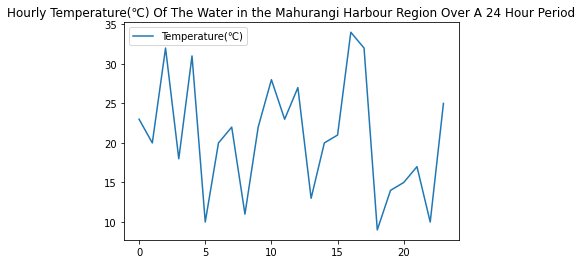

In [19]:
temperature_data.plot()
#plt.title(location)
plt.title('Hourly Temperature(℃) Of The Water in the Mahurangi Harbour Region Over A 24 Hour Period')

In [20]:
alerts = []
for temp in water_temps:
    if temp < 12 or temp > 35:
        print("Temperature outside of desirable range")
        alerts.append(temp)
    else:
        print("Temperature within desirable range")

Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range
Temperature within desirable range
Temperature within desirable range
Temperature outside of desirable range
Temperature within desirable range


In [21]:
print(alerts)

[10, 11, 9, 10]
